# Cleaning sentiment data

## Description

We will handle two languages: English and Spanish.

For English we will work with the next datasets:
* EPL tweets dataset
* Sentiment140

For Spanish we will work with the next datasets:
* TASS general
* Emociones
* emoji
* interTASS
* Spanish Airlines tweets

interTASS data is a dataset from [TASS](http://www.sepln.org/workshops/tass) that gathers tweets in Spanish from several countries (Spain, Mexico, Costa Rica and Peru). Each tweet is labeled by its sentiment (N-Negative, NEU-Neutral, P-Positive, NONE-None). The data is in XML format, so we will have to perform a parsing process in order to extract the useful data.

## Loading files

In [1]:
import unidecode
import re

import pandas               as pd
import pandas_read_xml      as pdx
import matplotlib.pyplot    as plt
from os                   import listdir
from os.path              import isfile, join

### English

#### EPL

In [2]:
EPL_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\English\\Premier League\\Raw\\"
EPL_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\English\\Premier League\\Processed\\"

In [3]:
epl_paths = [f_path for f_path in listdir(EPL_RAW_PATH) if isfile(join(EPL_RAW_PATH, f_path))]

epl_sentiment_dataset = pd.DataFrame()
for epl_dataset in epl_paths:
    df = pd.read_csv(EPL_RAW_PATH + epl_dataset)
    df = df[["twitter_id", "text", "polarity"]]
    epl_sentiment_dataset = pd.concat([epl_sentiment_dataset, df], axis=0, ignore_index=True)

epl_sentiment_dataset.head(2)

,twitter_id,text,polarity
0,1281189890936504320,This is a strange claim #LFC https://t.co/U1...,-0.2023
1,1281189827468279808,RT @TheKopiteOFF: 😱| #LFC have won 30 of their...,0.8316


In [4]:
epl_sentiment_dataset["dataset"] = "EPL"
epl_sentiment_dataset["language"] = "EN"

There are some tweets that have duplicates. We will drop them keeping just the first occurrence, this is because all the duplicates have the same polarity value.

In [5]:
len(epl_sentiment_dataset)

1010582

In [6]:
epl_sentiment_dataset = epl_sentiment_dataset.drop_duplicates("twitter_id", keep="first", ignore_index=True)
len(epl_sentiment_dataset)

901266

In [7]:
epl_sentiment_dataset = epl_sentiment_dataset.rename(columns={"twitter_id": "tweet_id", "polarity": "sentiment", "text": "content"})
epl_sentiment_dataset.head(2)

,tweet_id,content,sentiment,dataset,language
0,1281189890936504320,This is a strange claim #LFC https://t.co/U1...,-0.2023,EPL,EN
1,1281189827468279808,RT @TheKopiteOFF: 😱| #LFC have won 30 of their...,0.8316,EPL,EN


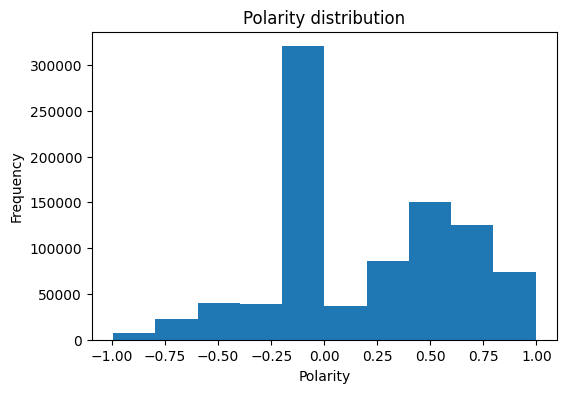

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
epl_sentiment_dataset["sentiment"].plot(kind="hist",
                                   ax=ax)

ax.set(title="Polarity distribution",
       xlabel="Polarity",
       ylabel="Frequency");

#### Sentiment140

In [9]:
s140_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\English\\Sentiment140\\Raw\\"
s140_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\English\\Sentiment140\\Processed\\"

In [10]:
s140_paths = [f_path for f_path in listdir(s140_RAW_PATH) if isfile(join(s140_RAW_PATH, f_path))]
s140_sentiment_dataset = pd.read_csv(s140_RAW_PATH + s140_paths[0], encoding="latin-1", names=["label", "id", "date", "query", "user", "text"])
s140_sentiment_dataset.head(2)

,label,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


There are some tweets that have duplicates. We will drop them as the same tweet may have a different label.

In [11]:
len(s140_sentiment_dataset)

1600000

In [12]:
s140_sentiment_dataset = s140_sentiment_dataset.drop_duplicates("id", keep=False, ignore_index=True)
len(s140_sentiment_dataset)

1596630

In [13]:
s140_sentiment_dataset = s140_sentiment_dataset.drop(["query", "date", "user"], axis=1)
s140_sentiment_dataset["dataset"] = "S140"
s140_sentiment_dataset["language"] = "EN"
s140_sentiment_dataset = s140_sentiment_dataset.rename(columns={"id": "tweet_id", "label": "sentiment", "text": "content"})
s140_sentiment_dataset.head(2)

,sentiment,tweet_id,content,dataset,language
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",S140,EN
1,0,1467810672,is upset that he can't update his Facebook by ...,S140,EN


In [14]:
s140_sentiment_dataset["sentiment"].value_counts()

0    798315
4    798315
Name: sentiment, dtype: int64

### Spanish

#### TASS general

In [15]:
TASS_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\TASS\\Raw\\"
TASS_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\TASS\\Processed\\"

In [16]:
tass_paths = [f_path for f_path in listdir(TASS_RAW_PATH) if isfile(join(TASS_RAW_PATH, f_path))]
tass_sentiment = pdx.read_xml(TASS_RAW_PATH+tass_paths[0],  encoding="utf8")
tass_sentiment = pdx.fully_flatten(tass_sentiment)
tass_sentiment.head(2)

,tweets|tweet|tweetid,tweets|tweet|user,tweets|tweet|content,tweets|tweet|date,tweets|tweet|lang,tweets|tweet|topics|topic,tweets|tweet|sentiments|polarity|value,tweets|tweet|sentiments|polarity|type,tweets|tweet|sentiments|polarity|entity
0,142416095012339712,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,es,política,N+,AGREEMENT,NaN
1,142416095012339712,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,es,economía,N+,AGREEMENT,NaN


In [17]:
tass_sentiment = tass_sentiment.drop(["tweets|tweet|user", 
                                        "tweets|tweet|lang", 
                                        "tweets|tweet|topics|topic", 
                                        "tweets|tweet|sentiments|polarity|type", 
                                        "tweets|tweet|sentiments|polarity|entity"],
                                    axis=1)
tass_sentiment.columns = ["tweetid", "content", "date", "sentiment"]

There are some tweets that have duplicates. We will drop them keeping just the first occurrence, this is because all the duplicates have the same polarity value.

In [18]:
tass_sentiment = tass_sentiment.drop_duplicates("tweetid", ignore_index=True)
tass_sentiment.head()

,tweetid,content,date,sentiment
0,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,N+
1,142521019171749888,abcdesevilla.es: Recio no tiene «indicios pote...,2011-12-02T09:30:33,N
2,142521301054140416,La marcha atrás del PP en posponer devolución ...,2011-12-02T09:31:40,N
3,142536698188931072,Viernes negro: Aumenta el paro en Noviembre y ...,2011-12-02T10:32:51,N+
4,142579605327450115,se puede entender que la misma solidaridad que...,2011-12-02T13:23:21,NEU


In [19]:
tass_sentiment = tass_sentiment.drop(["date"], axis=1)
tass_sentiment["dataset"] = "TASS"
tass_sentiment["language"] = "SP"
tass_sentiment = tass_sentiment.rename(columns={"tweetid": "tweet_id", "label": "sentiment"})

In [20]:
tass_sentiment["sentiment"].value_counts()

P+      1652
NONE    1483
N       1335
P       1232
N+       847
NEU      670
Name: sentiment, dtype: int64

In [21]:
tass_sentiment = tass_sentiment.replace("NONE", "NEU")
tass_sentiment["sentiment"].value_counts()

NEU    2153
P+     1652
N      1335
P      1232
N+      847
Name: sentiment, dtype: int64

#### Emociones

In [22]:
EMOTIONS_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Emotions\\Raw\\"
EMOTIONS_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Emotions\\Processed\\"

In [23]:
emotions_paths = [f_path for f_path in listdir(EMOTIONS_RAW_PATH) if isfile(join(EMOTIONS_RAW_PATH, f_path))]
emotions_sentiment = pd.read_csv(EMOTIONS_RAW_PATH+emotions_paths[0], sep='\t', encoding="utf8")
emotions_sentiment.head(2)

,id,tweet,label
0,1,-Spoiler- Nadie ha tenido el dilema de tener q...,others
1,2,Yo solo quiero saber donde esta HASHTAG? HASHT...,others


In [24]:
emotions_sentiment.columns = [col.strip() for col in emotions_sentiment.columns]

In [25]:
emotions_sentiment = emotions_sentiment.rename(columns={"id": "tweet_id", "tweet": "content", "label": "sentiment"})
print(len(emotions_sentiment))
emotions_sentiment = emotions_sentiment.drop(emotions_sentiment[emotions_sentiment["sentiment"] == "others "].index, axis=0)
print(len(emotions_sentiment))


857
436


In [26]:
emotions_sentiment["dataset"] = "EMOTIONS"
emotions_sentiment["language"] = "SP"
emotions_sentiment.head(2)

,tweet_id,content,sentiment,dataset,language
2,3,"La literatura nos hace más empáticos, dispuest...",joy,EMOTIONS,SP
3,4,"Para mi, estas son las 4 mejores escenas de es...",surprise,EMOTIONS,SP


#### Spanish Airlines Tweets

In [27]:
SAT_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Spanish Airlines\\Raw\\"
SAT_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Spanish Airlines\\Processed\\"

In [28]:
sat_paths = [f_path for f_path in listdir(SAT_RAW_PATH) if isfile(join(SAT_RAW_PATH, f_path))]
sat_sentiment = pd.read_csv(SAT_RAW_PATH+sat_paths[0],  encoding="utf8")
sat_sentiment.head(2)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/r...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City


In [29]:
sat_sentiment = sat_sentiment[["tweet_id", "text", "airline_sentiment"]]
sat_sentiment = sat_sentiment.rename(columns={"text": "content", "airline_sentiment": "sentiment"})
sat_sentiment

,tweet_id,content,sentiment
0,926419989107798016,Trabajar en #Ryanair como #TMA: https://t.co/r...,neutral
1,934854385577943041,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,neutral
2,945318406441635840,Sabiais que @Iberia te trata muy bien en santi...,negative
3,927540721296568320,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,negative
4,947965901332197376,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,positive
...,...,...,...
7862,946509662341554176,@Iberia @iberiaexpress especialistas en dejart...,negative
7863,935946417495035904,"Con @Iberia, mi destino a un solo click. ¡Dese...",neutral
7864,945770846949396480,@Iberia Muy bien. Muchas gracias,positive
7865,943045386570223616,Es que volar con Ryanair es peor que irte a ch...,negative


In [30]:
sat_sentiment["sentiment"].value_counts()

negative    3769
neutral     2609
positive    1489
Name: sentiment, dtype: int64

In [31]:
sat_sentiment["dataset"] = "SAT"
sat_sentiment["language"] = "SP"
sat_sentiment.head(2)

,tweet_id,content,sentiment,dataset,language
0,926419989107798016,Trabajar en #Ryanair como #TMA: https://t.co/r...,neutral,SAT,SP
1,934854385577943041,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,neutral,SAT,SP


#### Emoji

In [32]:
EMOJI_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Tweets emoji\\Raw\\"
EMOJI_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\Tweets emoji\\Processed\\"

In [33]:
emoji_paths = [f_path for f_path in listdir(EMOJI_RAW_PATH) if isfile(join(EMOJI_RAW_PATH, f_path))]

neg_s_file = open(EMOJI_RAW_PATH+emoji_paths[0],'r', encoding='utf-8')
neg_s_contents = neg_s_file.readlines()

pos_s_file = open(EMOJI_RAW_PATH+emoji_paths[1],'r', encoding='utf-8')
pos_s_contents = pos_s_file.readlines()

neg_s_cleaned_lines = [line.replace("\n", "").replace(":(","").replace("(","") for line in neg_s_contents]
pos_s_cleaned_lines = [line.replace("\n", "").replace(":)","").replace(")","") for line in pos_s_contents]

In [34]:
neg_emoji_sentiment = pd.DataFrame(columns=["content", "sentiment"])
neg_emoji_sentiment["content"] = neg_s_cleaned_lines
neg_emoji_sentiment["sentiment"] = 0

pos_emoji_sentiment = pd.DataFrame(columns=["content", "sentiment"])
pos_emoji_sentiment["content"] = pos_s_cleaned_lines
pos_emoji_sentiment["sentiment"] = 1

emoji_sentiment = pd.concat([neg_emoji_sentiment, pos_emoji_sentiment], axis=0, ignore_index=True)
emoji_sentiment = emoji_sentiment.sample(frac=1, random_state=42)

In [35]:
emoji_sentiment["dataset"] = "EMOJI"
emoji_sentiment["language"] = "SP"
emoji_sentiment["id"] = emoji_sentiment.index
emoji_sentiment = emoji_sentiment.rename(columns={"id": "tweet_id"})
emoji_sentiment.head(2)

,content,sentiment,dataset,language,tweet_id
119376,no puedo creer que hace una semana estaba espe...,0,EMOJI,SP,119376
63288,pinches piquetes de moscos no me dejan,0,EMOJI,SP,63288


In [36]:
emoji_sentiment["sentiment"].value_counts()

0    122216
1     55360
Name: sentiment, dtype: int64

#### interTASS

In [37]:
INTERTASS_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\InterTASS\\Raw\\"
INTERTASS_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\InterTASS\\Processed\\"

In [38]:
intertass_paths = [f_path for f_path in listdir(INTERTASS_RAW_PATH) if isfile(join(INTERTASS_RAW_PATH, f_path))]
intertass_sentiment_dataset = pd.DataFrame()
for intertass_dataset in intertass_paths:
    df = pdx.read_xml(INTERTASS_RAW_PATH+intertass_dataset,  encoding="utf8")
    df = pdx.fully_flatten(df)
    df.columns = ["tweetid", "user", "content", "date", "lang", "sentiment"]
    df["country"] = intertass_dataset.split("_")[2]
    df["type"] = intertass_dataset.split("_")[3].split(".")[0]
    intertass_sentiment_dataset = pd.concat([intertass_sentiment_dataset, df], axis=0, ignore_index=True)

In [39]:
intertass_sentiment_dataset = intertass_sentiment_dataset.drop(["user", "date", "lang", "country", "type"], axis=1)

In [40]:
intertass_sentiment_dataset["dataset"] = "INTERTASS"
intertass_sentiment_dataset["language"] = "SP"
intertass_sentiment_dataset = intertass_sentiment_dataset.rename(columns={"tweetid": "tweet_id"})
intertass_sentiment_dataset = intertass_sentiment_dataset.replace("NONE", "NEU")
intertass_sentiment_dataset.head(2)

,tweet_id,content,sentiment,dataset,language
0,769802080701648896,@DexterAOM por eso es que se dice lo del final...,NEU,INTERTASS,SP
1,772253053328105472,"@kikorobles11 6 meses con la banda y largo, fu...",NEU,INTERTASS,SP


In [41]:
intertass_sentiment_dataset["sentiment"].value_counts()

N      2844
NEU    2323
P      2098
Name: sentiment, dtype: int64

#### Spanish Airlines Tweets

In [42]:
INTERTASS_RAW_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\InterTASS\\Raw\\"
INTERTASS_PROC_PATH = "C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Spanish\\InterTASS\\Processed\\"

In [43]:
intertass_paths = [f_path for f_path in listdir(INTERTASS_RAW_PATH) if isfile(join(INTERTASS_RAW_PATH, f_path))]
intertass_sentiment_dataset = pd.DataFrame()
for intertass_dataset in intertass_paths:
    df = pdx.read_xml(INTERTASS_RAW_PATH+intertass_dataset,  encoding="utf8")
    df = pdx.fully_flatten(df)
    df.columns = ["tweetid", "user", "content", "date", "lang", "sentiment"]
    df["country"] = intertass_dataset.split("_")[2]
    df["type"] = intertass_dataset.split("_")[3].split(".")[0]
    intertass_sentiment_dataset = pd.concat([intertass_sentiment_dataset, df], axis=0, ignore_index=True)

In [44]:
intertass_sentiment_dataset = intertass_sentiment_dataset.drop(["user", "date", "lang", "country", "type"], axis=1)

In [45]:
intertass_sentiment_dataset["dataset"] = "SAT"
intertass_sentiment_dataset["language"] = "SP"
intertass_sentiment_dataset = intertass_sentiment_dataset.rename(columns={"tweetid": "tweet_id"})
intertass_sentiment_dataset = intertass_sentiment_dataset.replace("NONE", "NEU")
intertass_sentiment_dataset.head(2)

,tweet_id,content,sentiment,dataset,language
0,769802080701648896,@DexterAOM por eso es que se dice lo del final...,NEU,SAT,SP
1,772253053328105472,"@kikorobles11 6 meses con la banda y largo, fu...",NEU,SAT,SP


In [46]:
intertass_sentiment_dataset["sentiment"].value_counts()

N      2844
NEU    2323
P      2098
Name: sentiment, dtype: int64

## Scaling the sentiment

The sentiment variable is different for each dataset, in order to merge the data we need to standardize it. We will use a scale from 0 to 1 to determine the sentiment of a sentence. Being 1 a positive sentiment and 0 a negative one, making it posible for a sentence to have a sentiment value between 0 and 1.

In [47]:
# EPL
print(epl_sentiment_dataset["sentiment"].min(), epl_sentiment_dataset["sentiment"].max())
epl_sentiment_dataset["sentiment"] = (epl_sentiment_dataset["sentiment"] + 1)/2
print(epl_sentiment_dataset["sentiment"].min(), epl_sentiment_dataset["sentiment"].max())


-0.9953 0.9971
0.0023500000000000187 0.99855


In [48]:
# S140
s140_sentiment_dataset["sentiment"] = s140_sentiment_dataset["sentiment"]/4

In [49]:
# TASS
print(tass_sentiment["sentiment"].value_counts())

tass_sentiment_dict = {
    "N+": 0,
    "N": 0.25,
    "NEU": 0.5,
    "P": 0.75,
    "P+": 1,
}

tass_sentiment["sentiment"] = tass_sentiment["sentiment"].replace(tass_sentiment_dict)

print(tass_sentiment["sentiment"].value_counts())



NEU    2153
P+     1652
N      1335
P      1232
N+      847
Name: sentiment, dtype: int64
0.50    2153
1.00    1652
0.25    1335
0.75    1232
0.00     847
Name: sentiment, dtype: int64


In [50]:
# EMOTIONS
emotions_dict = {
    "joy ": 1,
    "surprise ": 1,
    "anger ": 0,
    "sadness ": 0,
    "disgust ": 0,
    "fear ": 0,
}

emotions_sentiment = emotions_sentiment.replace(emotions_dict)
emotions_sentiment.head(2)

,tweet_id,content,sentiment,dataset,language
2,3,"La literatura nos hace más empáticos, dispuest...",1,EMOTIONS,SP
3,4,"Para mi, estas son las 4 mejores escenas de es...",1,EMOTIONS,SP


In [51]:
# SPANISH AIRLINES
sat_sentiment_dict = {
    "negative": 0,
    "neutral": 0.5,
    "positive": 1
}
sat_sentiment = sat_sentiment.replace(sat_sentiment_dict)

In [52]:
# EMOJI
emoji_sentiment["sentiment"].value_counts()

0    122216
1     55360
Name: sentiment, dtype: int64

In [53]:
# INTERTASS
print(intertass_sentiment_dataset["sentiment"].value_counts())
intertass_sentiment_dict = {
    "N": 0,
    "NEU": 0.5,
    "P": 0.1,
}
intertass_sentiment_dataset["sentiment"] = intertass_sentiment_dataset["sentiment"].replace(intertass_sentiment_dict)
print(intertass_sentiment_dataset["sentiment"].value_counts())

N      2844
NEU    2323
P      2098
Name: sentiment, dtype: int64
0.0    2844
0.5    2323
0.1    2098
Name: sentiment, dtype: int64


In [54]:
emoji_sentiment[emoji_sentiment["sentiment"] == 1]

,content,sentiment,dataset,language,tweet_id
149613,COMPÁRTELO SI NO TE AVERGÜENZA ..VER MAS ►► h...,1,EMOJI,SP,149613
140249,Buen inicio de semana a toditos,1,EMOJI,SP,140249
152021,"@chanihenares El ""porqué"", Chani. Un abrazo. :-",1,EMOJI,SP,152021
122620,(En el blog De donde eres: De Brasil http://t...,1,EMOJI,SP,122620
138839,"@countertr Gracias por seguirme, en breve te d...",1,EMOJI,SP,138839
...,...,...,...,...,...
126324,@Negocios_Dinero muchas gracias,1,EMOJI,SP,126324
168266,GSMActivo http://t.co/RxV3FO0TTB Gracias por s...,1,EMOJI,SP,168266
137337,Yo y mi trauma con Alemania... estoy usando @d...,1,EMOJI,SP,137337
131932,Domingo de Pizzas! :,1,EMOJI,SP,131932


Now lets concatenate the datasets. We will only include 55360 rows for the negative tweets in the emoji dataset, in order to account for balance. As there are only 55360 rows of positive tweets.

In [55]:
emoji_sentiment_df = pd.concat([emoji_sentiment[emoji_sentiment["sentiment"] == 0].sample(n=55360, random_state=42),
                                emoji_sentiment[emoji_sentiment["sentiment"] == 1].sample(n=55360, random_state=42)],
                                axis=0,
                                ignore_index=True)

In [56]:
df_sentiment = pd.concat([epl_sentiment_dataset,
                            s140_sentiment_dataset,
                            tass_sentiment,
                            emotions_sentiment,
                            sat_sentiment,
                            emoji_sentiment_df,
                            intertass_sentiment_dataset
                        ], axis = 0, ignore_index=True)

df_sentiment.head()

,tweet_id,content,sentiment,dataset,language
0,1281189890936504320,This is a strange claim #LFC https://t.co/U1...,0.39885,EPL,EN
1,1281189827468279808,RT @TheKopiteOFF: 😱| #LFC have won 30 of their...,0.91580,EPL,EN
2,1281189824465174528,RT @SkySportsPL: 🔴 - #LFC secure first away wi...,0.93965,EPL,EN
3,1281189816890245121,Outrageous... Poor auld Martin Tyler has to ju...,0.15960,EPL,EN
4,1281189739618611200,RT @TheRedmenTV: ✅ Won the league ✅ Fastest te...,0.90880,EPL,EN


In [57]:
df_sentiment["language"].value_counts()

EN    2497896
SP     133507
Name: language, dtype: int64

There is a heavy imbalance regarding language. There are more than 10x english tweets than spanish tweets. We should evaluate sampling methods to reduce this imbalance.

In [58]:
df_sentiment["dataset"].value_counts()

S140        1596630
EPL          901266
EMOJI        110720
SAT           15132
TASS           7219
EMOTIONS        436
Name: dataset, dtype: int64

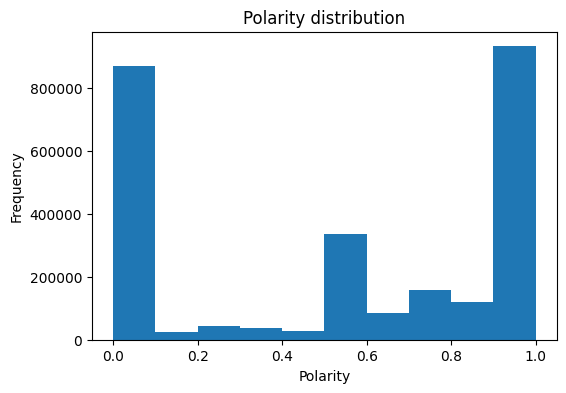

In [59]:
fig, ax = plt.subplots(figsize=(6,4))
df_sentiment["sentiment"].plot(kind="hist",
                                   ax=ax)

ax.set(title="Polarity distribution",
       xlabel="Polarity",
       ylabel="Frequency");

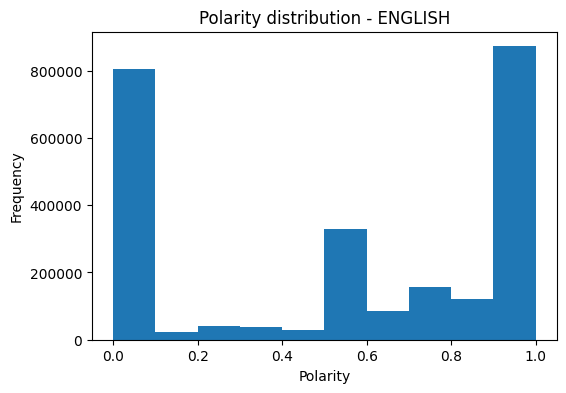

In [60]:
fig, ax = plt.subplots(figsize=(6,4))
df_sentiment[df_sentiment["language"] == "EN"]["sentiment"].plot(kind="hist",
                                   ax=ax)

ax.set(title="Polarity distribution - ENGLISH",
       xlabel="Polarity",
       ylabel="Frequency");

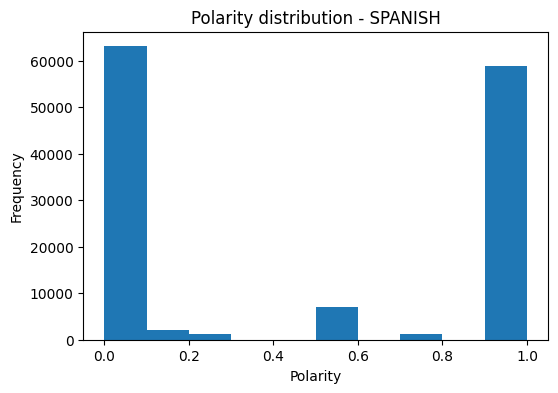

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
df_sentiment[df_sentiment["language"] == "SP"]["sentiment"].plot(kind="hist",
                                   ax=ax)

ax.set(title="Polarity distribution - SPANISH",
       xlabel="Polarity",
       ylabel="Frequency");

## Cleaning

We need to remove links, numbers, special characters, hashtags, and mentions from the content of the tweets. Accents will also be removed. We need to evaluate the posibility of removing emojis as well.

In [62]:
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def clean_text(text):
    #Remove emojis
    text_no_emojis = remove_emoji(text).replace("  ", " ")
    words = text_no_emojis.lower().split(" ")
    #Remove mentions, hashtags and links 
    words_nm = [word for word in words if ("@" not in word) and ("#" not in word) and ("http" not in word) and ("www" not in word)]
    #Remove accents
    words_nm = [unidecode.unidecode(word) for word in words_nm]

    #Remove special characters
    words_nm = [re.sub('[^A-Za-z0-9]+', '*', word) for word in words_nm]
    words_nm = [word for word in words_nm if "*" not in word]
    return " ".join(words_nm)

In [63]:
df_sentiment_cleaned = df_sentiment.copy()
df_sentiment_cleaned["content"] = df_sentiment_cleaned["content"].apply(lambda x: str(x)).apply(lambda x: clean_text(x))

In [82]:
# Drop empty tweets
print(len(df_sentiment_cleaned))
df_sentiment_cleaned = df_sentiment_cleaned.drop(df_sentiment_cleaned[df_sentiment_cleaned["content"] == ""].index, axis=0)
print(len(df_sentiment_cleaned))

2631403
2612264


In [83]:
df_sentiment_cleaned["tweet_id"] = df_sentiment_cleaned.index
df_sentiment_cleaned = df_sentiment_cleaned.sample(frac=1, random_state=42)

In [84]:
df_sentiment_cleaned.to_csv("C:\\Users\\DANIEL\\Desktop\\ITSENSE\\Vertikal\\Datasets\\Social\\Processed\\sentiment_data_cleaned_no_stem.csv", index=False)

Try stemming (?)

In [157]:
from nltk.stem import PorterStemmer
e_words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w in e_words:
    rootWord=ps.stem(w)
    print(rootWord)

wait
wait
wait
wait
